# Distributions 
### Normal Distribution
- the simplest and most well-known distribution
- X~N(0,1) indicates that the random variable X is normally distributed
- this is a special case of the chi-squared distribution with mean of 0 and variance of 1

### Chi-Squared Distribution ($\chi^2$)
- A bell curve-shaped distribution
- X~$\chi^2 (\mu, \sigma)$ indicates a mean of $\mu$ and a variance of $\sigma$

### Wishart Distribution
- A Normal distribution, generalized to n dimensions
- X~N(0, $\Sigma$) indicates X is normally distributed in n dimensions with an $n \times n$ co-variance matrix of $\Sigma$


# Covariance matrices

\begin{equation*}
cov(X,Y) = \mathbb{E} \left( [ X-\mathbb{E}(X) ][ Y-\mathbb{E}(Y) ] \right)
\end{equation*}

- or in geometric terms, the average square representing the difference between expectation and reality in the x and y directions
- correlation is symmetric, a unit-scaled version of covariance

\begin{equation*}
corr(X,Y) = \frac{cov(X,Y)}{\sigma_X \sigma_Y}
\end{equation*}



- Covariance tells us how the data's variance in one feature changes wrt another


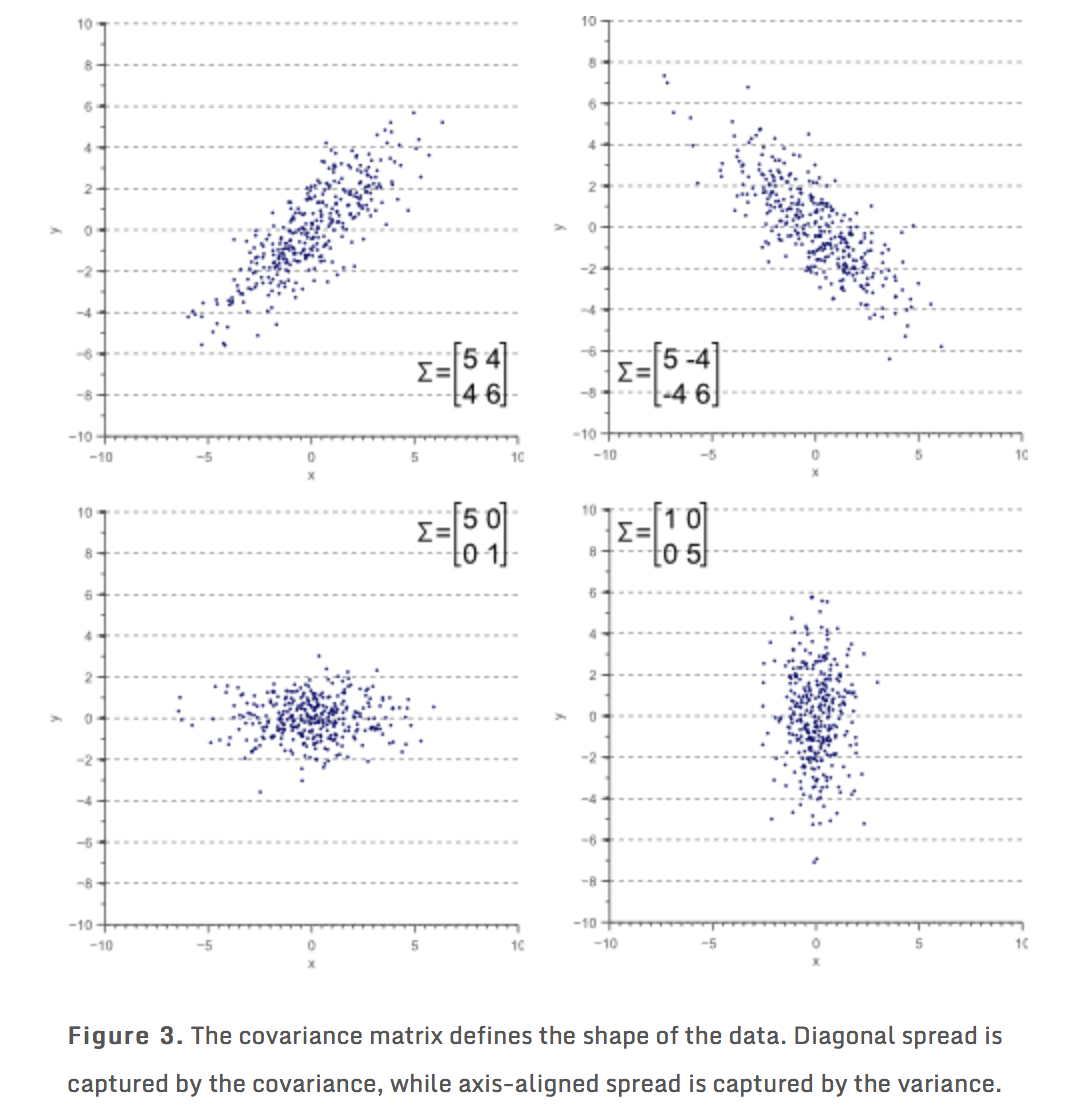

### Eigenvectors and Eigenvalues
- Covariance matrices $\sum$ express the spread and orientation of the data wrt two features at a time
- the vector and magnitude of this spread are the eigenvector and eigenvalue


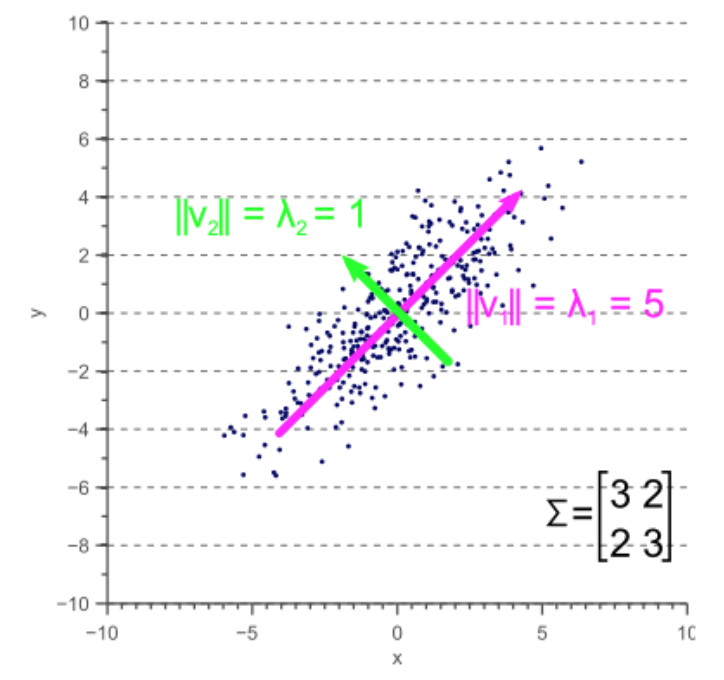


   - project the data D onto a vector $\vec{v}$:     $\vec{v}^TD$
   - evaluate the variance:
   \begin{equation*}
   \sigma^2 = \vec{v}^T \sum \vec{v}
   \end{equation*}
   - find the vector $\vec{v}$ such that $\vec{v}^T \sum \vec{v}$ (the variance) is maximized
   - this is equivalent to the largest eigenvector of matrix $\sum$
   - if $\sum$ is a diagonal matrix (covariances are 0), the variances are equal to the eigenvalues $\lambda$

    ####Singular Value Decomposition
    - a method to get a diagonal covariance matrix using eigendecomposition
    - the resulting eigenvectors point in the directions of largest variance
    - eigenvalues represent the magnitude of variance in these directions
    - [more info on SVD](http://www.visiondummy.com/2014/04/geometric-interpretation-covariance-matrix/)
    
### [Scikit-Learn implementation](http://scikit-learn.org/stable/modules/covariance.html)

### Empirical covariance
- estimated using Maximum Likelihood Estimator
- only if n >> features
- [how to fit a covariance object to data](http://scikit-learn.org/stable/auto_examples/covariance/plot_covariance_estimation.html#example-covariance-plot-covariance-estimation-py)

        sklearn.covariance.empirical_covariance(X, assume_centered=False)
        
***note:*** This is not a good estimation of eigenvalues of the covariance matrix

### Shrinkage covariance
- MLE covariance may be unbiased, but it is not a good estimator of eigenvalues
- and if n < features, the covariance matrix is not invertable (and the precision matrix is therefore unobtainable)
- given a shrinkage parameter $\alpha$ that amounts to a bias/variance tradeoff, compute an invertible matrix that reduces the ratio between the smallest and largest eigenvalues of $\sum$
- shrinkage parameter $\alpha$ should be chosen by cross-validation

#    $\sum_{shrunk} = (1-\alpha)\hat\Sigma+ \alpha \frac{Tr\hat\Sigma}{p}\mathbf{I}d$
    
- The optimal $\alpha$ can be computed using the [Ledoit-Wolf shrinkage algorithm](http://scikit-learn.org/stable/auto_examples/covariance/plot_covariance_estimation.html#example-covariance-plot-covariance-estimation-py)

### [Sparse Inverse covariance](http://scikit-learn.org/stable/auto_examples/covariance/plot_sparse_cov.html)
- use GraphLasso (an L1 regularization parameter) to sparsify the covariance matrix such that it can be inverted to produce a precision matrix

**Tip: ** Use a correlation matrix (standardized observations) 

### Robust covariance estimation
- Find the minimum covariance determinant
- in simple terms, find the proportion of non-outlier observations and compute their empirical covariance matrix
- then re-scale to represent entire dataset